In [10]:
hi = "hello world"
print hi

hello world


In [11]:
print hi + ", my name is david"

hello world, my name is david


In [12]:
import requests
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330')
print res

<Response [200]>


In [13]:
#print res.text

In [14]:
import requests
res = requests.get('http://justdata.yuanta.com.tw/z/zk/zkf/zkResult.asp?D=1&A=x@10,a@30&site=')
print res.encoding
res.encoding = 'big5'
#print res.text

ISO-8859-1


In [15]:
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'',
'year':'104',
'season':'03',    
}

In [16]:
print payload['year']

104


In [19]:
import requests
#print dir(requests)
res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data = payload)
#print res.text

In [21]:
res.encoding = 'utf-8'
#print res.text

In [31]:
import requests
payload = {
'select_item':'1',
'select_subitem':'1',
'Submit':'%B7j%B4M'
}
res = requests.post('http://www.twse.com.tw/ch/listed/listing_profile_inquiry.php', data=payload)
res.encoding = 'big5'
print type(res)
#print res.text

<class 'requests.models.Response'>


In [55]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'html.parser')
#print soup
#print type(soup)
print soup.text




Hello World
This is link1
This is link2




In [56]:
soup = BeautifulSoup(html_sample, 'html.parser') 
alink = soup.select('a') 
print type(alink)
print alink[0]
print type(alink[0])

<type 'list'>
<a class="link" href="#">This is link1</a>
<class 'bs4.element.Tag'>


In [57]:
h1 = soup.select('h1')
print h1
print h1[0]
print h1[0].text

[<h1 id="title">Hello World</h1>]
<h1 id="title">Hello World</h1>
Hello World


In [58]:
h1 = soup.select('#title') # id => #
print h1
print h1[0]
print h1[0].text

[<h1 id="title">Hello World</h1>]
<h1 id="title">Hello World</h1>
Hello World


In [59]:
links = soup.select('.link') # class => .
print links
print links[1]
print links[1].text
#print h1[0].text

[<a class="link" href="#">This is link1</a>, <a class="link" href="# link2">This is link2</a>]
<a class="link" href="# link2">This is link2</a>
This is link2


In [60]:
links = soup.select('a')
print links[0]
print links[0]['href']

<a class="link" href="#">This is link1</a>
#


In [61]:
a = '<a qoo=123 href=google>test</a>'
soup2 = BeautifulSoup(a, 'html.parser')
print soup2
print soup2.select('a')[0]['qoo']
print soup2.select('a')[0]['href']
#print soup['qoo']

<a href="google" qoo="123">test</a>
123
google


In [62]:
links = soup.select('a')
for link in links:
    print link['href']


#
# link2


In [66]:
#yui_3_5_1_13_1459136205160_7 > table:nth-child(9) > tbody > tr > td > table > tbody > tr:nth-child(2) > td:nth-child(3) > b
# pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330')


In [69]:
#print res.text
soup = bs(res.text)
#print soup.text
print soup.select('b')
print soup.select('b')[0]
print soup.select('b')[0].text

[<b>158.5</b>]
<b>158.5</b>
158.5


In [74]:
table = soup.select('table + table table')
tr = table[0].select('tr')[1]
print tr.select('td')[0].select('a')[0].text

2330台積電


In [94]:
print soup.select('td a')[12].text

2330台積電


In [95]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330')
soup = bs(res.text)

In [96]:
table = soup.select('table + table table')[0]

In [100]:
tr  = table.select('tr')
for td in tr[1].select('td'):
    print td.text

2330台積電加到投資組合
13:30
159.0
158.5
159.0
△1.0
                
15,268
158.0
158.0
159.0
157.0

成交明細技術　新聞基本　籌碼個股健診


In [101]:
s = " \t string test \t \n\n\r" ' \t string test \t \n\n\r' 
print s

 	 string test 	 

 	 string test 	 




In [102]:
print s.lstrip()

string test 	 

 	 string test 	 




In [103]:
print s.rstrip()

 	 string test 	 

 	 string test


In [104]:
print s.strip()

string test 	 

 	 string test


In [107]:
a = '12311111'
a.strip('1')

'23'

In [108]:
tr  = table.select('tr')
for td in tr[1].select('td'):
    print td.text.strip()

2330台積電加到投資組合
13:30
159.0
158.5
159.0
△1.0
15,268
158.0
158.0
159.0
157.0
成交明細技術　新聞基本　籌碼個股健診


In [109]:
tr  = table.select('tr')
for th in tr[0].select('th'):
    print th.text.strip()

股票代號
時間
成交
買進
賣出
漲跌
張數
昨收
開盤
最高
最低
個股資料


In [112]:
a = []
a.append(1)
a.append(2)
print a

[1, 2]


In [111]:
value = []
tr  = table.select('tr')
for td in tr[1].select('td'):
    value.append(td.text.strip())
#print value

In [114]:
name = []
tr  = table.select('tr')
for th in tr[0].select('th'):
    name.append(th.text.strip())
#print name

In [115]:
#declare dictionary 
dic = {'a':100, 'b':"yes", 'c':0.98} 
print dic 

{'a': 100, 'c': 0.98, 'b': 'yes'}


In [116]:
#get keys in dictionary 
print dic.keys() 

['a', 'c', 'b']


In [117]:
#get values in dictionary 
print dic.values() 

[100, 0.98, 'yes']


In [118]:
#get value of given key 
print dic['a'] 

100


In [119]:
print dic['d']

KeyError: 'd'

In [120]:
#get value of given key 
print dic.get('a')

100


In [121]:
print dic.get('d')

None


In [123]:
print dic.get('a', 'default')
print dic.get('d', 'default')

100
default


In [124]:
#add entry into dictionary 
dic['d'] = 'new' 
print dic 

{'a': 100, 'c': 0.98, 'b': 'yes', 'd': 'new'}


In [125]:
#add entry into dictionary 
dic.update({'e':123}) 
print dic 

{'a': 100, 'c': 0.98, 'b': 'yes', 'e': 123, 'd': 'new'}


In [126]:
# iter the dictionary 
for rec in dic: 
    print rec, dic[rec]

a 100
c 0.98
b yes
e 123
d new


In [127]:
print name
print value

[u'\u80a1\u7968\u4ee3\u865f', u'\u6642\u9593', u'\u6210\u4ea4', u'\u8cb7\u9032', u'\u8ce3\u51fa', u'\u6f32\u8dcc', u'\u5f35\u6578', u'\u6628\u6536', u'\u958b\u76e4', u'\u6700\u9ad8', u'\u6700\u4f4e', u'\u500b\u80a1\u8cc7\u6599']
[u'2330\u53f0\u7a4d\u96fb\u52a0\u5230\u6295\u8cc7\u7d44\u5408', u'13:30', u'159.0', u'158.5', u'159.0', u'\u25b31.0', u'15,268', u'158.0', u'158.0', u'159.0', u'157.0', u'\u6210\u4ea4\u660e\u7d30\u6280\u8853\u3000\u65b0\u805e\u57fa\u672c\u3000\u7c4c\u78bc\u500b\u80a1\u5065\u8a3a']


In [130]:
dic = {}
for n, v in zip(name, value):
    dic[n] =  v

In [132]:
print dic['成交'.decode('utf-8')]

159.0


In [141]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('http://www.cmoney.tw/notes/?aid=3')
soup = bs(res.text)
for article in soup.select('.p-article'):
    print article.select('h2')[0].text, \
          article.select('.author a')[0].text, \
          article.select('.browsN span')[0].text, \
          article.select('.article-date')[0].text
        

這 3 檔「隱藏版好股」1 個月漲 22%！看懂了，下個月的飆股，自然是 ____ 權證小哥 15379 2016-3-15
陸股波動大，用這「3 招」做陸股，你也能一日賺 20%！ 權證小哥 3440 2016-3-7
持股還沒漲嗎？原來只要靠「3大法人 + 這 1 招」讓你每次出手都在「起漲點」！ 權證小哥 8419 2016-3-4
2/18 浩鼎 (4174)「假突破」，原來這時候...應該要，下次再看到像這樣過熱一定先跑再說！ 權證小哥 6908 2016-3-1
原來用___方式做股票，讓你上班「不看盤」也能穩穩賺利息，甚至賺到大波段！ 權證小哥 6610 2016-2-26
只要看準這 6 點：當出現...黃金交叉時，就是抓住飆股「起漲」的好時機！ 權證小哥 6375 2016-2-18
原來只要看到 ___，就表示股價要反彈了！難怪這 3 條線，大家都 搶著學！ 權證小哥 7105 2016-2-16
股價上漲，權證一定漲嗎？那可不一定...玩權證，要知道的 10 個小撇步 ！(內附 3 檔危險清單) 權證小哥 2624 2016-2-3
市場上有一群「神秘大戶」，專門操作「金融股」...學會這招，明天就幫自己加薪 3000元！ 權證小哥 14256 2016-2-3
權證的高槓桿 是它迷人之處，但這 9 大指標不可不知！尤其是第 5 點... 權證小哥 4094 2016-2-2


In [145]:
import requests
import json
ACCESSTOKEN = 'AppID|AppSecret'

res = requests.get('https://graph.facebook.com/v2.5/tsaiingwen/posts?access_token={}'.format(ACCESSTOKEN) )


In [156]:
#pip install jieba
import jieba
from collections import Counter
c = Counter()
jd = json.loads(res.text)
for rec in jd['data']:
    for ele in jieba.cut(rec['message']):
        c[ele] +=1
for ele in c.most_common(10):
    if len(ele[0]) >= 2:
        print ele[0], ele[1]

In [179]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [180]:
df.head(3)

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [181]:
df[0]

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: 0, dtype: object

In [182]:
df[0][2]

'tom'

In [183]:
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [184]:
df['age']

0    29
1    23
2    35
3    33
4    21
5    20
Name: age, dtype: int64

In [185]:
df['age'].mean()

26.833333333333332

In [186]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [188]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [189]:
df.ix[0]

name      frank
gender        M
age          29
Name: 0, dtype: object

In [169]:
df.ix[1:4]

,name,gender,age
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [170]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [171]:
df[['name','age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [172]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [173]:
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [174]:
df[df['gender'] == 'M'].mean()

age    32.333333
dtype: float64

In [176]:
df[df['gender'] == 'F'].mean()

age    21.333333
dtype: float64

In [177]:
df.groupby('gender')['age'].mean()

gender
F    21.333333
M    32.333333
Name: age, dtype: float64

In [190]:
import pandas as pd
names1880 = pd.read_csv('names/yob1880.txt', 
                        names=['name', 'sex', 'births'])
print names1880.head(10)


        name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746
5   Margaret   F    1578
6        Ida   F    1472
7      Alice   F    1414
8     Bertha   F    1320
9      Sarah   F    1288


In [191]:
names1880.tail(10)

,name,sex,births
1990,Unknown,M,5
1991,Vann,M,5
1992,Wes,M,5
1993,Winston,M,5
1994,Wood,M,5
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [192]:
names1880['sex'].unique()

array(['F', 'M'], dtype=object)

In [194]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [197]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [198]:
names1880['year'] = 1880
names1880.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [199]:
import pandas as pd
namesall = []
for year in range(1880, 2011):
    path = 'names/yob' + str(year) + '.txt'
    df = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    df['year'] = year
    namesall.append(df)


In [204]:
print len(namesall)
namesall[3].head(3)

131


,name,sex,births,year
0,Mary,F,8012,1883
1,Anna,F,3306,1883
2,Emma,F,2367,1883


In [205]:
df_names = pd.concat(namesall, ignore_index=True)
df_names['year'].unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [206]:
df_names.groupby(['year', 'sex'])['births'].sum().head(10)

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
      M      113687
1883  F      112322
      M      104632
1884  F      129021
      M      114445
Name: births, dtype: int64

In [211]:
?df_names.pivot_table

In [213]:
births = df_names.pivot_table('births', index='year', 
                              columns='sex', aggfunc=sum)
births.head(5)


sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [214]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


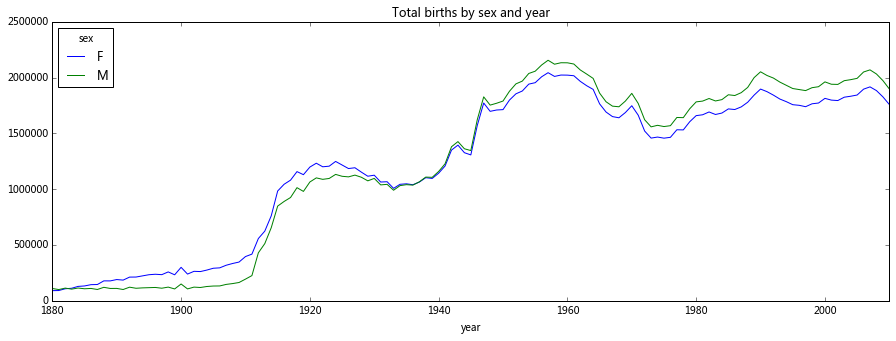

In [217]:
import matplotlib.pyplot as plt
births.plot(title='Total births by sex and year', figsize=(15, 5))
savefig('foo.png')
plt.show() 


In [216]:
%ls

 磁碟區 C 中的磁碟是 OS 7
 磁碟區序號:  C485-A13C

 C:\Users\User\pyfinance 的目錄

2016/03/28  下午 03:41    <DIR>          .
2016/03/28  下午 03:41    <DIR>          ..
2016/03/28  上午 09:41               826 .gitignore
2016/03/28  上午 11:50    <DIR>          .ipynb_checkpoints
2016/03/28  下午 03:41            98,558 20160328Demo.ipynb
2016/03/27  下午 10:46         1,192,960 finance.sqlite
2016/03/28  下午 03:20    <DIR>          names
2015/12/31  上午 01:17            30,969 pandas_readhtml.ipynb
2016/03/28  下午 12:15           853,469 Python_Crawler.ipynb
2016/03/28  上午 09:39                62 README.md
               6 個檔案       2,176,844 位元組
               4 個目錄  250,070,831,104 位元組可用


In [221]:
link = 'http://fsv.money01.com.tw/cmstatic/notes/capture/373300/20160315151537556_M.jpg'
print link.split('/')[-1]

20160315151537556_M.jpg


In [222]:
import requests
import shutil
from bs4 import BeautifulSoup as bs
res = requests.get('http://www.cmoney.tw/notes/?aid=3')
soup = bs(res.text)
for article in soup.select('.p-article'):
    image = article.select('img')[0]['src']
    filename = image.split('/')[-1]
    with open(filename, 'wb') as f:
        res2 = requests.get(article.select('img')[0]['src'], stream=True)
        shutil.copyfileobj(res2.raw, f)

In [248]:
import requests
import re
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101 Safari/537.36'
}
rs = requests.session()
res = rs.get('https://www.youtube.com/watch?v=RaT-Fb2fpos', headers = headers)


In [249]:
import json
m = re.search('"args":({.*?}),', res.text)
jd = json.loads(m.group(1))

In [260]:
import urlparse
stream_map = urlparse.parse_qs(jd["url_encoded_fmt_stream_map"])
print stream_map['url'][-1]

https://r2---sn-ipoxu-un5s.googlevideo.com/videoplayback?itag=17&key=yt6&source=youtube&mime=video%2F3gpp&mv=m&signature=ACC52CCE5D5B32D677309FE4B6B27312F6249DC6.42E5950519BDA3FE070FD6C5F866FBD8034B0B35&fexp=9416126%2C9420452%2C9422596%2C9423661%2C9423662%2C9427902&ip=220.128.109.49&ms=au&mn=sn-ipoxu-un5s&pl=21&mm=31&requiressl=yes&dur=291.503&id=o-AH6qhIAI_ycV7NUhT9zltFj0FijtFyeR5waaLw5aox17&sparams=dur%2Cid%2Cinitcwndbps%2Cip%2Cipbits%2Citag%2Clmt%2Cmime%2Cmm%2Cmn%2Cms%2Cmv%2Cpl%2Crequiressl%2Csource%2Cupn%2Cexpire&expire=1459174549&ipbits=0&upn=hkCpVAY5cno&sver=3&lmt=1389195415958551&initcwndbps=2607500&mt=1459152833


In [261]:
with open('b.mp4', 'wb') as f:
    res2 = rs.get(stream_map['url'][-1], stream=True)
    shutil.copyfileobj(res2.raw, f)

In [267]:
table = """
<table> 
    <thead> 
        <tr> 
        <th>Month</th>  
        <th>Savings</th> 
        </tr> 
    </thead> 
    <tbody> 
        <tr> <td>January</td> <td>$100</td></tr> 
        <tr> <td>February</td> <td>$80</td></tr> 
    </tbody> 
    <tfoot> 
        <tr> <td>Sum</td> <td>$180</td> </tr> 
    </tfoot> 
</table>
"""
import pandas as pd
df = pd.read_html(table)
#?pd.read_html
print type(df)
df[0]

<type 'list'>


,Month,Savings
0,January,$100
1,February,$80
2,Sum,$180


In [269]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://tw.stock.yahoo.com/q/q?s=2330')

soup = bs(res.text)
table = soup.select('table + table table')[0]


In [284]:
import pandas as pd
print type(table)

dfs = pd.read_html(table.prettify('utf-8'), encoding= 'utf-8')
dfs[0]

<class 'bs4.element.Tag'>


,0,1,2,3,4,5,6,7,8,9,10,11
0,股票 代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低,個股資料
1,2330台積電 加到投資組合,14:30,159.0,158.5,159.0,△1.0,15291,158.0,158.0,159.0,157.0,成交明細 技術 新聞 基本 籌碼 個股健診
2,凱基證券下單,買 賣 張 零股交易,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
dfs = pd.read_html(table.prettify('utf-8'), encoding= 'utf-8', header=0)
dfs[0]

,股票 代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,最低,個股資料
0,2330台積電 加到投資組合,14:30,159,158.5,159,△1.0,15291,158,158,159,157,成交明細 技術 新聞 基本 籌碼 個股健診
1,凱基證券下單,買 賣 張 零股交易,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
dfs[0]['成交'.decode('utf-8')][0]

159.0

In [295]:
dfs[0].ix[0]

股票  代號               2330台積電  加到投資組合
時間                             14:30
成交                               159
買進                             158.5
賣出                               159
漲跌                              △1.0
張數                             15291
昨收                               158
開盤                               158
最高                               159
最低                               157
個股資料      成交明細  技術  新聞  基本  籌碼  個股健診
Name: 0, dtype: object

In [313]:
import pandas as pd
dfs = pd.read_html('https://tw.stock.yahoo.com/q/q?s=2330', header=0)

In [315]:
dfs[5]

,"股票代號 時間 成交 買進 賣出 漲跌 張數 昨收 開盤 最高 最低 個股資料 2330台積電加到投資組合 14:30 159.0 158.5 159.0 △1.0 15,291 158.0 158.0 159.0 157.0 成交明細技術 新聞基本 籌碼個股健診 凱基證券下單 買 賣 張 零股交易",股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,...,159.0.1,△1.0,"15,291",158.0,158.0.1,159.0.2,157.0,成交明細技術 新聞基本 籌碼個股健診,凱基證券下單,買 賣 張 零股交易
0,股票代號,時間,成交,買進,賣出,漲跌,張數,昨收,開盤,最高,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2330台積電加到投資組合,14:30,159.0,158.5,159.0,△1.0,15291,158.0,158.0,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,凱基證券下單,買 賣 張 零股交易,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
